In [184]:
import pandas as pd

In [185]:
df = pd.read_csv('../usdvnd/processed/cleaned_features_regression.csv').drop(columns=['Mở', 'Cao', 'Thấp'])
df.set_index('Ngày', inplace=True)
df.index = pd.to_datetime(df.index)
# Tách X và y
# X sẽ bỏ cột 'Target', 'Ngày' và các cột giá gốc (đã có lag/MA)
X = df.drop(columns=['Target', 'Lần cuối'])
y = df['Target']

In [186]:
df.index[0]

Timestamp('1994-09-03 00:00:00')

In [187]:
X

,% Thay đổi,Lần cuối 1,% Thay đổi 1,Lần cuối 3,Lần cuối 7,MA 7,MA 30,Std dev 7,RSI 14,Ngày thứ,Tháng thứ,Quý thứ,Năm thứ
Ngày,,,,,,,,,,,,,
1994-09-03,0.00,10988.0,0.00,10988.0,10981.0,10987.000000,10982.400000,2.645751,100.000000,5,9,3,1994
1994-09-04,0.00,10988.0,0.00,10988.0,10981.0,10988.000000,10982.633333,0.000000,100.000000,6,9,3,1994
1994-09-05,0.00,10988.0,0.00,10988.0,10988.0,10988.000000,10982.866667,0.000000,100.000000,0,9,3,1994
1994-09-06,0.00,10988.0,0.00,10988.0,10988.0,10988.000000,10983.100000,0.000000,100.000000,1,9,3,1994
1994-09-07,0.00,10988.0,0.00,10988.0,10988.0,10988.000000,10983.333333,0.000000,100.000000,2,9,3,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-04,0.03,26312.0,-0.01,26315.0,26328.0,26320.428571,26333.833333,9.071147,39.545455,1,11,4,2025
2025-11-05,0.01,26320.0,0.03,26315.0,26336.0,26318.500000,26332.416667,6.184658,38.425926,2,11,4,2025
2025-11-06,-0.03,26322.5,0.01,26312.0,26330.0,26316.357143,26330.750000,3.590662,41.500000,3,11,4,2025


In [188]:
split_point = int(len(X))

X_train, y_train = X.iloc[:split_point], y.iloc[:split_point]
X_test, y_test = X.iloc[split_point:], y.iloc[split_point:]

In [189]:
X_train.columns

Index(['% Thay đổi', 'Lần cuối 1', '% Thay đổi 1', 'Lần cuối 3', 'Lần cuối 7',
       'MA 7', 'MA 30', 'Std dev 7', 'RSI 14', 'Ngày thứ', 'Tháng thứ',
       'Quý thứ', 'Năm thứ'],
      dtype='object')

In [190]:
import xgboost as xgb
import numpy as np

# Khởi tạo mô hình XGBoost Regressor
xgb_regressor = xgb.XGBRegressor(
    objective="reg:squarederror",
    n_estimators=500,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

# Huấn luyện mô hình
# (XGBoost Regressor thường hoạt động tốt với dữ liệu chưa scale)
xgb_regressor.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
# y_pred = xgb_regressor.predict(X_test)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [191]:
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# # 1. Tính toán MAE
# mae = mean_absolute_error(y_test, y_pred)

# # 2. Tính toán RMSE
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# # 3. r2
# r2 = r2_score(y_test, y_pred)

# print("--- Đánh giá Hiệu suất Regression ---")
# print(f"Lỗi tuyệt đối trung bình (MAE): {mae:.2f} VNĐ")
# print(f"Căn bậc hai lỗi bình phương trung bình (RMSE): {rmse:.2f} VNĐ")
# print(f"R2: {r2:.2f}")

In [192]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(18, 8))
# plt.plot(X['Lần cuối'][X.index >= '2025-09-01'], label='Giá thực tế')
# # plt.plot(X_test.index, y_test, label='Giá thực tế')
# plt.plot(X_test.index[X_test.index >= '2025-09-01'], y_pred[X_test.index >= '2025-09-01'], label='Dự đoán')
# plt.legend()
# plt.show()


In [193]:
# # Plot importances
# import matplotlib.pyplot as plt
# from xgboost import plot_importance

# plot_importance(
#     xgb_regressor,
#     importance_type="gain",
#     max_num_features=20,
#     height=0.5,
#     show_values=False
# )
# plt.title("Important Features (XGBoost)", fontsize=14)
# plt.show()

In [194]:
df_today = df.copy()

# relative strength index 14 days
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - 100 / (1 + rs)
    rsi = rsi.fillna(50) # prevent division by zero
    return rsi

def get_tomorrow_features(df_today: pd.DataFrame) -> pd.DataFrame:
    # get tomorrow's features from today's data
    df_tomorrow = df_today[-1:].copy()
    df_tomorrow.index = df_tomorrow.index + pd.Timedelta(days=1)
    
    # Use the last known 'Lần cuối' value, not 'Target'
    last_close = df_today.iloc[-1]['Lần cuối']
    df_tomorrow['Lần cuối'] = last_close
    
    # lag features - need to look back at df_today, not shift within df_tomorrow
    # 1 day
    df_tomorrow['Lần cuối 1'] = df_today.iloc[-1]['Lần cuối']
    df_tomorrow['% Thay đổi 1'] = df_today.iloc[-1]['% Thay đổi']

    # 3 days
    df_tomorrow['Lần cuối 3'] = df_today.iloc[-3]['Lần cuối'] if len(df_today) >= 3 else last_close

    # 7 days
    df_tomorrow['Lần cuối 7'] = df_today.iloc[-7]['Lần cuối'] if len(df_today) >= 7 else last_close
    
    # sliding window features - need to calculate from df_today's recent history

    # moving average 7 and 30 days
    df_tomorrow['MA 7'] = df_today['Lần cuối'].tail(7).mean()
    df_tomorrow['MA 30'] = df_today['Lần cuối'].tail(30).mean()

    # volatility 7 days
    df_tomorrow['Std dev 7'] = df_today['Lần cuối'].tail(7).std()
    
    # RSI 14 - calculate from recent history
    df_tomorrow['RSI 14'] = calculate_rsi(df_today['Lần cuối']).iloc[-1]

    # time features
    df_tomorrow['Ngày thứ'] = df_tomorrow.index.dayofweek # 0 is Monday
    df_tomorrow['Tháng thứ'] = df_tomorrow.index.month
    df_tomorrow['Quý thứ'] = df_tomorrow.index.quarter
    df_tomorrow['Năm thứ'] = df_tomorrow.index.year
    return df_tomorrow   


def predict_next_30_days(df_today: pd.DataFrame) -> pd.DataFrame:
    # get tomorrow's features from today's data
    df_predictions = df_today.copy()
    
    for i in range(30):
        temp_df_tomorrow = get_tomorrow_features(df_predictions)
        print(f"Predicting day {i+1}")
        # Predict using features (excluding Target and Lần cuối column)
        feature_cols = [col for col in temp_df_tomorrow.columns if col != 'Target' and col != 'Lần cuối']
        temp_df_tomorrow['Target'] = xgb_regressor.predict(temp_df_tomorrow[feature_cols])
        print(f"Predicted Target: {temp_df_tomorrow['Target'].values[0]}")
        
        # Update 'Lần cuối' with predicted value for next iteration
        temp_df_tomorrow['Lần cuối'] = temp_df_tomorrow['Target']
        
        print("Concatenating prediction to history")
        df_predictions = pd.concat([df_predictions, temp_df_tomorrow])
        print(f"Latest row: {df_predictions.tail(1)[['Lần cuối', 'Target']].values}")
    
    return df_predictions.tail(30)

df_next_30_days = predict_next_30_days(df_today)


Predicting day 1
Predicted Target: 26318.490234375
Concatenating prediction to history
Latest row: [[26318.49023438 26318.49023438]]
Predicting day 2
Predicted Target: 26318.30078125
Concatenating prediction to history
Latest row: [[26318.30078125 26318.30078125]]
Predicting day 3
Predicted Target: 26316.68359375
Concatenating prediction to history
Latest row: [[26316.68359375 26316.68359375]]
Predicting day 4
Predicted Target: 26313.2421875
Concatenating prediction to history
Latest row: [[26313.2421875 26313.2421875]]
Predicting day 5
Predicted Target: 26314.216796875
Concatenating prediction to history
Latest row: [[26314.21679688 26314.21679688]]
Predicting day 6
Predicted Target: 26316.4765625
Concatenating prediction to history
Latest row: [[26316.4765625 26316.4765625]]
Predicting day 7
Predicted Target: 26322.28515625
Concatenating prediction to history
Latest row: [[26322.28515625 26322.28515625]]
Predicting day 8
Predicted Target: 26329.302734375
Concatenating prediction to h

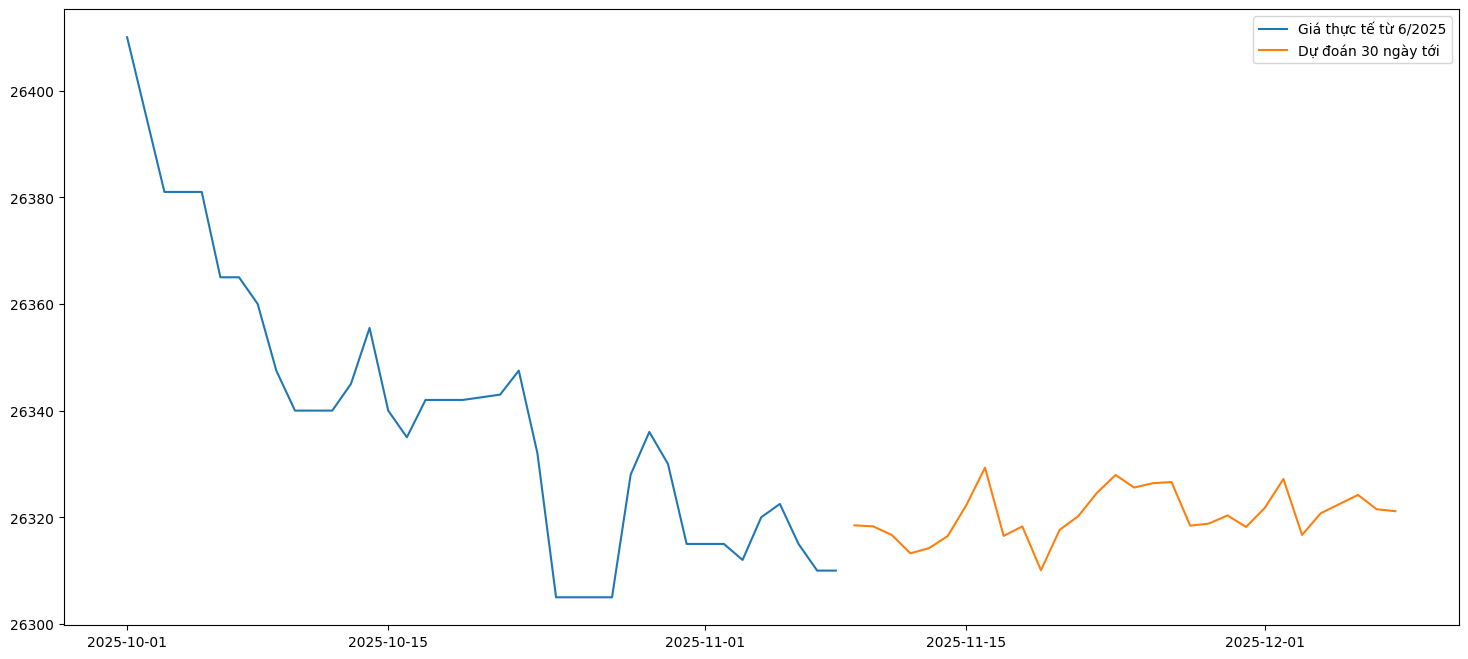

In [198]:
# visualize the prediction
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 8))
plt.plot(df_today['Lần cuối'][df_today.index >= '2025-10-01'], label='Giá thực tế từ 6/2025')
plt.plot(df_next_30_days.index, df_next_30_days['Target'], label='Dự đoán 30 ngày tới')
plt.legend()
plt.show()

In [196]:
df_next_30_days

,Lần cuối,% Thay đổi,Lần cuối 1,% Thay đổi 1,Lần cuối 3,Lần cuối 7,MA 7,MA 30,Std dev 7,RSI 14,Ngày thứ,Tháng thứ,Quý thứ,Năm thứ,Target
Ngày,,,,,,,,,,,,,,,
2025-11-09,26318.490234,0.0,26310.000000,0.0,26315.000000,26315.000000,26314.928571,26327.833333,4.834154,53.205128,6,11,4,2025,26318.490234
2025-11-10,26318.300781,0.0,26318.490234,0.0,26310.000000,26312.000000,26315.427176,26327.116341,5.019203,57.798704,0,11,4,2025,26318.300781
2025-11-11,26316.683594,0.0,26318.300781,0.0,26310.000000,26320.000000,26316.327288,26326.393034,4.864755,57.672375,1,11,4,2025,26316.683594
2025-11-12,26313.242188,0.0,26316.683594,0.0,26318.490234,26322.500000,26315.853516,26325.615820,4.601847,41.334649,2,11,4,2025,26313.242188
2025-11-13,26314.216797,0.0,26313.242188,0.0,26318.300781,26315.000000,26314.530971,26324.557227,3.593081,31.265676,3,11,4,2025,26314.216797
2025-11-14,26316.476562,0.0,26314.216797,0.0,26316.683594,26310.000000,26314.419085,26323.181120,3.588232,35.835232,4,11,4,2025,26316.476562
2025-11-15,26322.285156,0.0,26316.476562,0.0,26313.242188,26310.000000,26315.344308,26322.397005,3.054098,51.718026,5,11,4,2025,26322.285156
2025-11-16,26329.302734,0.0,26322.285156,0.0,26314.216797,26318.490234,26317.099330,26321.973177,3.000503,57.467168,6,11,4,2025,26329.302734
2025-11-17,26316.509766,0.0,26329.302734,0.0,26316.476562,26318.300781,26318.643973,26321.549935,5.542339,62.816339,0,11,4,2025,26316.509766
